In [1]:
import numpy as np
import pandas as pd
%display typeset

In [2]:
def model(t, y, params):
    S, E, I, R = y
    B, beta, mu, eps, gamma = params
    return [
        B - beta * S * I - mu * S,  # dS/dt
        beta * S * I - (eps + mu) * E,  # dE/dt
        eps * E - (gamma + mu) * I,  # dI/dt
        gamma * I - mu * R,  # dR/dt
    ]


In [3]:
B = 0.01
beta = 0.47272459855759813
mu = 0.00000000000000001
eps = 0.04168480042146949
gamma = 0.04

T = ode_solver()
T.function = model
inits = [.99, 0, 1e-6, 0]
tspan = [0,500]
T.ode_solve(tspan, inits, num_points=5, params=[B, beta, mu, eps, gamma])
model1 = [(k[0], k[1][3]) for k in T.solution]

In [4]:
data1 = np.genfromtxt('data.csv', delimiter=',')[1:]
data2 = [(k[0], k[1]) for k in data1]

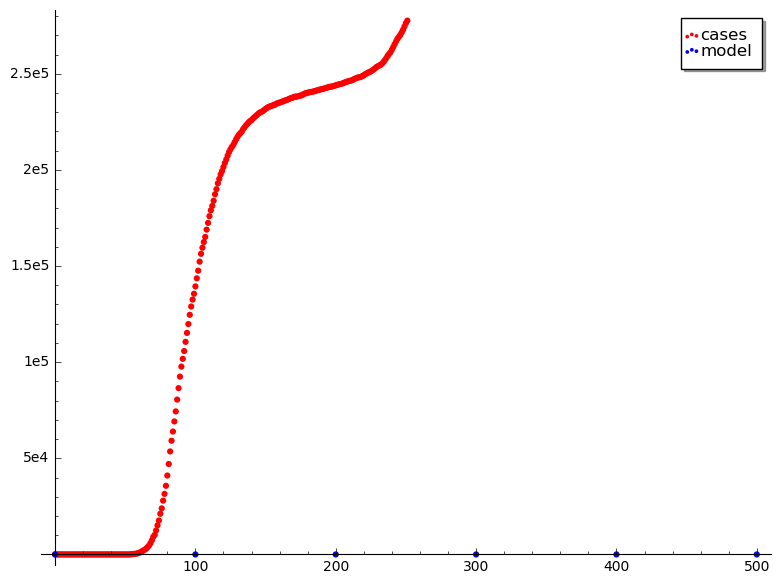

In [7]:
plot1 = list_plot(data2, color='red', pointsize=20, legend_label='cases', alpha=1)
plot1.legend()

plot2 = list_plot(model1, color='blue', pointsize=20, legend_label='model', alpha=1)
plot2.legend()

show(plot1+plot2)